In [1]:
import pandas as pd
import back_propagation as bp

import quesadilla as qd

In [2]:
df = pd.read_csv(r'C:\Users\Chulabutrach\Documents\Coding\Projects\pttgc\neural_network\data\CardiovascularStudyDataset\train.csv')
df['sex_numeric'] = df['sex'].apply(lambda x: 1 if x == 'F' else 0)
df['is_smoking_numeric'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)
df = df.dropna(axis=0).reset_index(drop=True)

print(df.shape)
df.head()

(2927, 19)


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_numeric,is_smoking_numeric
0,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,0
1,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1
2,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1
3,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,1
4,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,1,0


<AxesSubplot:xlabel='TenYearCHD'>

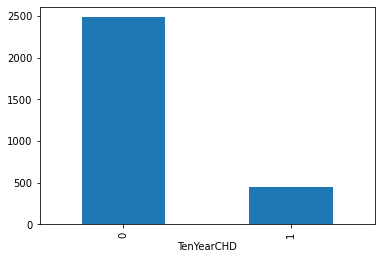

In [3]:
df.groupby('TenYearCHD').id.nunique().plot.bar()

Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'TenYearCHD'],
      dtype='object')


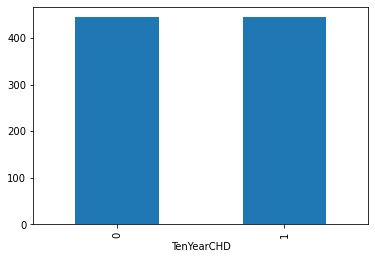

In [4]:
df_good = df.loc[df['TenYearCHD'] == 1]
df_bad = df.loc[df['TenYearCHD'] == 0]

df_bad = df_bad.sample(n=len(df_good), random_state=10)
df = df_good.append(df_bad).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df.groupby('TenYearCHD').id.nunique().plot.bar()

df = df.drop(['id', 'sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'sex_numeric', 'is_smoking_numeric', 'prevalentHyp', 'diabetes'], axis=1)
temp = qd.normalization(df, ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose',])
print(df.columns)
df_test = temp.tail(100)
df = temp.head(754)

In [5]:
df.shape

(754, 9)

In [6]:
x = df
y = x.pop('TenYearCHD').values.tolist()
x = x.values.tolist()

In [7]:
n_inputs = len(x[0])
n_outputs = 2
network = bp.initialize_networks(n_inputs, 10, n_outputs, n_layers=50)
bp.train_network(network, x, y, 0.35, 300, n_outputs)

epoch= 1 ,  lrate= 0.35 ,  error= 0.5174702017051237
epoch= 2 ,  lrate= 0.35 ,  error= 0.5109240277557935
epoch= 3 ,  lrate= 0.35 ,  error= 0.5071748959669443
epoch= 4 ,  lrate= 0.35 ,  error= 0.505281073409398
epoch= 5 ,  lrate= 0.35 ,  error= 0.5043464975581815
epoch= 6 ,  lrate= 0.35 ,  error= 0.5038412029399169
epoch= 7 ,  lrate= 0.35 ,  error= 0.5035392136788199
epoch= 8 ,  lrate= 0.35 ,  error= 0.5033434640306527
epoch= 9 ,  lrate= 0.35 ,  error= 0.5032084008451574
epoch= 10 ,  lrate= 0.35 ,  error= 0.503110606233507
epoch= 11 ,  lrate= 0.35 ,  error= 0.503037063480686
epoch= 12 ,  lrate= 0.35 ,  error= 0.5029800555876079
epoch= 13 ,  lrate= 0.35 ,  error= 0.5029347583291287
epoch= 14 ,  lrate= 0.35 ,  error= 0.5028980203202775
epoch= 15 ,  lrate= 0.35 ,  error= 0.5028677056864472
epoch= 16 ,  lrate= 0.35 ,  error= 0.5028423209197265
epoch= 17 ,  lrate= 0.35 ,  error= 0.5028207933910849
epoch= 18 ,  lrate= 0.35 ,  error= 0.5028023347267617
epoch= 19 ,  lrate= 0.35 ,  error= 0.502

epoch= 153 ,  lrate= 0.35 ,  error= 0.502600391772414
epoch= 154 ,  lrate= 0.35 ,  error= 0.5026002826037935
epoch= 155 ,  lrate= 0.35 ,  error= 0.5026001749915547
epoch= 156 ,  lrate= 0.35 ,  error= 0.5026000689032969
epoch= 157 ,  lrate= 0.35 ,  error= 0.502599964307503
epoch= 158 ,  lrate= 0.35 ,  error= 0.502599861173509
epoch= 159 ,  lrate= 0.35 ,  error= 0.5025997594714746
epoch= 160 ,  lrate= 0.35 ,  error= 0.5025996591723606
epoch= 161 ,  lrate= 0.35 ,  error= 0.502599560247893
epoch= 162 ,  lrate= 0.35 ,  error= 0.50259946267055
epoch= 163 ,  lrate= 0.35 ,  error= 0.502599366413527
epoch= 164 ,  lrate= 0.35 ,  error= 0.5025992714507208
epoch= 165 ,  lrate= 0.35 ,  error= 0.5025991777567022
epoch= 166 ,  lrate= 0.35 ,  error= 0.5025990853066973
epoch= 167 ,  lrate= 0.35 ,  error= 0.5025989940765655
epoch= 168 ,  lrate= 0.35 ,  error= 0.5025989040427806
epoch= 169 ,  lrate= 0.35 ,  error= 0.50259881518241
epoch= 170 ,  lrate= 0.35 ,  error= 0.5025987274730968
epoch= 171 ,  lrate

In [8]:
x_test = df_test
y_test = x_test.pop('TenYearCHD').values.tolist()
x_test = x_test.values.tolist()

In [9]:
accuracy = bp.accuracy_evaluation(network, x_test, y_test)
print(accuracy)

# print(bp.make_predictions_list(network, x_test, y_test))

{'TP': 45, 'FN': 0, 'FP': 55, 'TN': 0, 'accuracy': 0.45, 'f1': 0.6206896551724138, 'precision': 0.45, 'negative_precision': None, 'sensitivity': 1.0, 'specificity': 0.0}


In [10]:
print(bp.make_predictions_list(network, x_test))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
# y_test

In [12]:
accuracy['accuracy']

0.45

In [13]:
# network

In [14]:
# [[{'weights': [0.6074679995160704,
#     0.09913652417190878,
#     0.14216430206827274,
#     1.502686631130311,
#     -0.49585854896534376,
#     1.2633853474501664,
#     -0.23354776135810962,
#     1.2660969763573875],
#    'bias': -2.0730850587197143,
#    'output': 0.276654162179163,
#    'delta': -0.0725518260266973},
#   {'weights': [-1.7614345121504054,
#     -0.7146126428624058,
#     -1.1088291215844996,
#     -1.094959008609441,
#     -0.23853083184392498,
#     -0.46068164492396696,
#     -0.17335058343954848,
#     -1.0381677816580173],
#    'bias': 0.16035632717479043,
#    'output': 0.10257445836677327,
#    'delta': 0.02123674568997745},
#   {'weights': [0.3994495636446534,
#     0.659563830390619,
#     -0.029834371555551353,
#     1.0656326671994356,
#     -0.2931474049311444,
#     0.10754735722922,
#     -0.6644565113671417,
#     1.5203811173178772],
#    'bias': -1.5932895255087525,
#    'output': 0.2536913455081108,
#    'delta': -0.04288428297841101},
#   {'weights': [-0.8083601694904184,
#     -2.982308577821891,
#     -0.48876092210004246,
#     -1.8393193210634673,
#     -0.1615455853342914,
#     -1.1450201580093256,
#     0.31693222377538866,
#     -0.831874265572262],
#    'bias': 0.29817250760145325,
#    'output': 0.08374115858491865,
#    'delta': 0.05049474081327247},
#   {'weights': [0.8262908802878588,
#     1.3209917222606071,
#     0.8740236578148403,
#     3.5729656672242545,
#     -0.9090252941002097,
#     2.097543138461264,
#     -1.8365177905333094,
#     2.5172544917665864],
#    'bias': -2.6812536034339103,
#    'output': 0.3453879105684355,
#    'delta': -0.1487145367083105},
#   {'weights': [-0.7574683502885877,
#     -0.3444652877514412,
#     -0.021791306799952514,
#     -1.0415099956508371,
#     -0.10924931716997172,
#     -0.05766921413984793,
#     -0.7638897976686103,
#     -0.06648252405652577],
#    'bias': -0.8424788740160323,
#    'output': 0.09865795947409783,
#    'delta': 0.009911589259407655},
#   {'weights': [-2.480700730443713,
#     -0.9581420476023711,
#     -1.8500702608300976,
#     -2.450415359283258,
#     -0.12298954877977429,
#     -1.136390718928373,
#     0.5779365419654751,
#     -1.1844642688287657],
#    'bias': 1.2920769515893704,
#    'output': 0.11430829882089141,
#    'delta': 0.028398093121676318},
#   {'weights': [-0.5948943899847573,
#     -0.29803615551113755,
#     -0.306367539240443,
#     -0.7334193582803589,
#     -0.11553153680322738,
#     -1.0756140920058548,
#     -0.2283002866632846,
#     -0.96173538681487],
#    'bias': -0.6082044083668496,
#    'output': 0.11764253769507871,
#    'delta': 0.01294828705871006},
#   {'weights': [-0.44018151120484306,
#     -0.8238140326820441,
#     -0.7714409476191517,
#     -1.0708233726611973,
#     -0.06643086677948576,
#     -1.1238797492599066,
#     -0.601300758332719,
#     -1.1234375125312186],
#    'bias': -0.18310985646235672,
#    'output': 0.10839636980589937,
#    'delta': 0.019669486939145664},
#   {'weights': [-0.7318264017208604,
#     -0.9078170833180025,
#     -0.3113571571775215,
#     -1.1614220806685949,
#     -0.2875625690906962,
#     -0.06587479369325767,
#     -0.40592277130928683,
#     -0.7005473498749725],
#    'bias': -0.5089142904334263,
#    'output': 0.10223061816391682,
#    'delta': 0.017455522969350122}],
#  [{'weights': [-1.125647260978749,
#     0.6433204440773787,
#     -1.2102343434448073,
#     1.7144948037450447,
#     -2.1723487156146697,
#     0.749840933221983,
#     2.155258649559784,
#     0.7256548823513721,
#     0.9970933708579047,
#     0.4833604053780893],
#    'bias': -0.1931967394477335,
#    'output': 0.3123461556515187,
#    'delta': 0.13449803843101205},
#   {'weights': [1.1483740055132508,
#     -1.8285587561515726,
#     0.529011789678622,
#     -1.8029775141459676,
#     2.316845006704057,
#     -0.13437417414097544,
#     -1.687960773303954,
#     -0.5675439520257232,
#     -0.7987529829685147,
#     -0.8653468861791302],
#    'bias': 0.32950767596717856,
#    'output': 0.6889167885763323,
#    'delta': -0.13336364171988566}]]